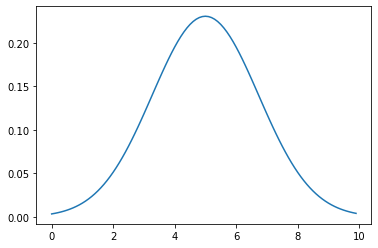

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def normal_dist_density(x,mu,sigma):
  return 1/np.sqrt(2*np.pi*sigma)*np.exp(np.negative(np.square(np.subtract(x,mu)))/(2*sigma))

x = np.arange(0.,10., 0.1)  # from 0 to 10 with 100 steps
y = normal_dist_density(x,5,3)
plt.plot(x,y)


Text(0, 0.5, 'p(u|v)')

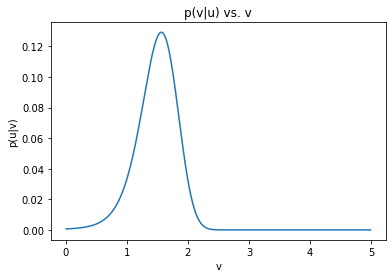

In [3]:
# Exercise 1 : Exact soltion of Posterior p(u|v)
# ==============================================

observed_light_intensity_u  = 2
receptor_noise_sigma_u = 1
mean_prior_food_size_v_p = 3
variance_prior_food_size_sigma_p = 1

dv = 0.01
v_size_range = np.arange(0.01,5, dv)

# p(v)) is the prob density of every v in the array assuming the prior knowledge of v distribution 
# this is a prior knowledge before even observing any evidence 
p_v = normal_dist_density(v_size_range, mean_prior_food_size_v_p,variance_prior_food_size_sigma_p)

# p(u|v) is the prob that u happened given that v is true 
p_u_given_v = normal_dist_density(observed_light_intensity_u,np.square(v_size_range),receptor_noise_sigma_u )

p_u = sum(p_u_given_v * dv)

posterior_size_v_given_u = p_v * p_u_given_v/ p_u  # for u = 2
plt.plot( v_size_range, posterior_size_v_given_u )
plt.title('p(v|u) vs. v')
plt.xlabel('v')
plt.ylabel('p(u|v)')

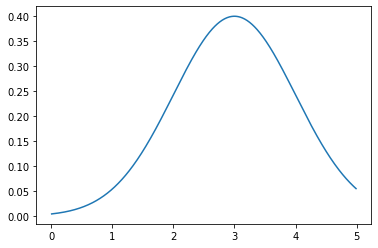

In [4]:
# Note: the prior v is given below:
plt.plot(v_size_range,p_v)

In [5]:
# adding an observation of u=2, because it is so *improbable* (max(p(v) is at u = 9, very far from u=2) shifted the posterio so much !

Text(0, 0.5, 'phi(t)')

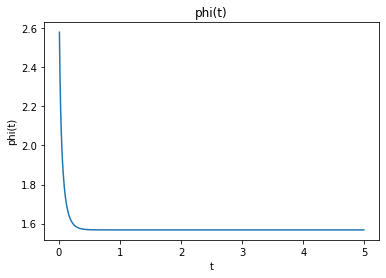

In [6]:
# exercise #2 : Instead of finding (the difficult to compute) exact solution (a whole prob density for all u)
# we find just the phi that maximize the posterior (the brain probably keep only the max posterior and not all prob options )
# but, we do it in a non biologically plosible way - gradient descent
# ===========================================================================================================================
Dt = 0.01
Vp = 3 
phi = Vp
sigma_p = 1
sigma_u = 1
u = 2

def g(u):
  return u**2

def g_tag(u):
  return 2*u

phi_trace = []
t_range = np.arange(0.01,5,Dt)
for t in t_range:
  F_grad_vs_phi = (Vp - phi)/sigma_p + (u - g(phi))/sigma_u * g_tag(phi)
  phi_next_t = phi + Dt * F_grad_vs_phi
  phi = phi_next_t
  phi_trace.append(phi)


plt.plot( t_range, phi_trace )
plt.title('phi(t)')
plt.xlabel('t')
plt.ylabel('phi(t)')

Text(0, 0.5, 'phi(t)')

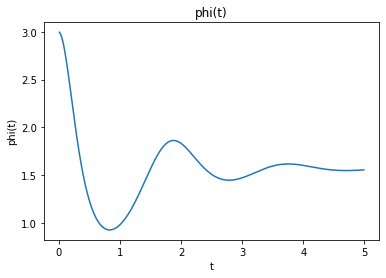

In [7]:
# Exercise 3 : Hebbian learning: Learning the errors from Local knowledge
# basically same as ex 2 but with plausible biology - two nodes keeping state u and v
# and error message passing between them (and between upper layer ("prior") providing prediction)
# ============================================================
Vp = 3
phi = Vp
error_p = error_u = 0
Dt = 0.01

phi_trace = []
t_range = np.arange(0.01,5,Dt)
for t in t_range:
  d_error_p = phi - Vp - sigma_p*error_p
  d_error_u = u - g(phi) - sigma_u*error_u
  error_p = error_p + d_error_p*Dt
  error_u = error_u + d_error_u*Dt
  
  d_phi = error_u*g_tag(phi) - error_p
  phi = phi + Dt * d_phi
  phi_trace.append(phi)


plt.plot( t_range, phi_trace )
plt.title('phi(t)')
plt.xlabel('t')
plt.ylabel('phi(t)')


Text(0, 0.5, 'sigma')

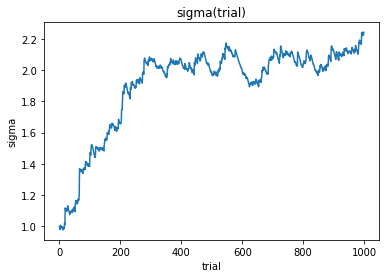

In [49]:
# Exercise 5 - Hebbian Learning (Local plasticity) of predicion error variance for 
# multi-dimentional features
# ===============================================================================


mu, sigma = 5, np.sqrt(2) # mean and standard deviation (sqrt(variance))
g_i_phi_i_next = 5
alpha = 0.01
trials = 1000
time_steps = 20
dt = 0.01
epsilon_i = 0
error_i = 0
sigma_i = 1
sigma_trace = []

for trial in range(trials):
  phi_i = np.random.normal(mu, sigma)
  for step in range(time_steps*int(1/dt)):
    d_epsilon_i = phi_i - g_i_phi_i_next - error_i
    d_error_i = sigma_i * epsilon_i - error_i
    epsilon_i += d_epsilon_i*dt
    error_i += d_error_i*dt

  sigma_i += alpha * (epsilon_i * error_i - 1)
  sigma_trace.append(sigma_i)

trial_range = list(range(trials))
plt.plot( trial_range, sigma_trace )
plt.title('sigma(trial)')
plt.xlabel('trial')
plt.ylabel('sigma')